# Python for Finance: Simple vs Log Returns and Normality Assumptions

<b> YouTube Tutorial </b> (Published: May 3, 2021): https://youtu.be/NNu1DjWcYeY

In this tutorial we try to understand the difference between simple returns and log returns.


We also talk about normality of financial data!

## THE MAIN REASON

### If we want to model returns using the normal distribution!

- SIMPLE RETURNS: The product of normally distributed variables is NOT normally distributed

- LOG RETURNS: The sum of normally distributed variables DOES follow a normal distribution

Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality.

In [ ]:
## This is required for pandas_datareader on google colab - then you need to restart runtime
!pip install --upgrade pandas_datareader

     |████████████████████████████████| 109 kB 27.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


#### Step 1: Import dependencies

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
from pandas_datareader import data as pdr
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

#### Step 2: get stock market data
Choose a date range and select stock to chart.

In [ ]:
end = dt.datetime.now()
start = dt.datetime(2018,1,1)

df = pdr.get_data_yahoo('CBA.AX', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-12,107.080002,106.000000,106.790001,106.709999,1334658.0,106.709999
2022-04-13,106.900002,106.080002,106.550003,106.550003,1479813.0,106.550003
2022-04-14,107.105003,105.830002,105.910004,106.500000,1393778.0,106.500000
2022-04-19,107.370003,106.419998,106.809998,107.010002,1758577.0,107.010002
2022-04-20,108.050003,106.860001,107.510002,107.239998,1831268.0,107.239998


### Part 1: Simple vs Log Returns

Firstly one period simple returns

$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$

$1 + R_t = \frac{P_t}{P_{t-1}}$

Calculate Daily Simple Returns

In [ ]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2018-01-02   -0.000997
2018-01-03   -0.002121
2018-01-04    0.014881
2018-01-07    0.005668
2018-01-08    0.006984
                ...   
2022-04-12   -0.001591
2022-04-13   -0.001499
2022-04-14   -0.000469
2022-04-19    0.004789
2022-04-20    0.002149
Name: Close, Length: 1088, dtype: float64

For multi-period k returns

$1 + R_t(k) = \frac{P_t}{P_{t-1}}\frac{P_{t-1}}{P_{t-2}}...\frac{P_{t-k+1}}{P_{t-k}} = \frac{P_t}{P_{t-k}}$

$1 + R_t(k) = (1 + R_t)(1 + R_{t-1})...(1 + R_{t-k+1})$

$1 + R_t(k) = \prod_{i=0}^{k-1} (1 + R_{t-i})$

Plot financial data and look at first and last share prices

In [ ]:
df.Close.plot().update_layout(autosize=False,width=500,height=300).show(renderer="colab")

In [ ]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 80.22000122070312 Last 107.23999786376953


Use simple returns & attempt to compute final price from starting price over time horizon

In [ ]:
simple_returns.mean()

0.000392514504731439

In [ ]:
df.Close[0]*(1+simple_returns.mean())**len(simple_returns)

122.94595466429226

In [ ]:
df.Close[0]*np.prod([(1+Rt) for Rt in simple_returns])

107.23999786376913

#### Log Returns

Now onto one period log returns:

$r_t = \ln(1+R_t)$

K-period log returns:

$r_t(k) = \ln(1+R_t(k)) = \ln[(1+R_t)(1+R_{t-1})...(1+R_{t-k+1})]$

$r_t(k) = \ln(1+R_t(k)) = \ln(1+R_t) + \ln(1+R_{t-1}) + ... + \ln(1+R_{t-k+1})$

$r_t(k) = \ln(1+R_t(k)) = r_t + r_{t-1} + ... + r_{t-k+1} = \ln(P_t) - \ln(P_{t-k})$

Compute log returns in python

In [ ]:
log_returns = np.log(df.Close / df.Close.shift(1)).dropna()
log_returns

Date
2018-01-02   -0.000998
2018-01-03   -0.002124
2018-01-04    0.014771
2018-01-07    0.005652
2018-01-08    0.006959
                ...   
2022-04-12   -0.001592
2022-04-13   -0.001500
2022-04-14   -0.000469
2022-04-19    0.004777
2022-04-20    0.002147
Name: Close, Length: 1088, dtype: float64

In [ ]:
log_returns.mean()

0.00026681656055957463

In [ ]:
df.Close[0] * np.exp(len(log_returns) * log_returns.mean())

107.23999786376935

## AGAIN, THE MAIN REASON

### If we want to model returns using the normal distribution!

- SIMPLE RETURNS: The product of normally distribution variables is NOT normally distributed

- LOG RETURNS: The sum of normally distributed variables follows a normal distribution

Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality.

#### Histogram of log returns

In [ ]:
log_returns.plot(kind='hist').update_layout(autosize=False,width=500,height=300).show(renderer="colab")

### Is normality a good assumption for financial data?

The assumption that prices or more accurately log returns are normally distributed!

In [ ]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

std_worst = (worst - log_returns.mean())/log_returns.std()
std_best = (best - log_returns.mean())/log_returns.std()
print('Assuming price is normally distributed: ')
print(' Standard dev. worst %.2f and best %.2f' %(std_worst, std_best))
print(' Probability of worst %.13f and best %.13f' %(stats.norm(0, 1).pdf(std_worst), stats.norm(0, 1).pdf(std_best)))

Assuming price is normally distributed: 
 Standard dev. worst -6.58 and best 7.75
 Probability of worst 0.0000000001533 and best 0.0000000000000


### Part 2: Testing for Normality
https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

#### Q-Q or Quantile-Quantile Plots
It plots two sets of quantiles against one another i.e. theoretical quantiles against the actual quantiles of the variable.

Q-Q Plot


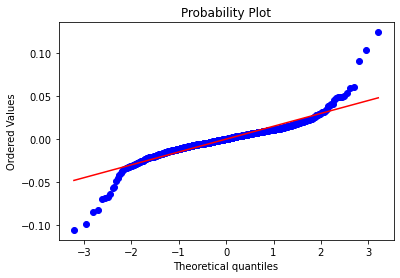

In [ ]:
stats.probplot(log_returns, dist='norm', plot=pylab)
print('Q-Q Plot')

#### Box Plots
Box Plot also know as a box and whisker plot is another way to visualize the normality of a variable. It displays the distribution of data based on a five-number summary i.e. minimum, first quartile (Q1), median (Q2), third quartile (Q3) and maximum.

In [ ]:
log_returns.plot(kind = 'box').update_layout(autosize=False,width=350,height=500).show(renderer="colab")

## Hypothesis Testing / Statistical Inference ?

Why would you do it - Can give a more objective answer!

#### Kolmogorov Smirnov test

The Kolmogorov Smirnov test computes the distances between the empirical distribution and the theoretical distribution and defines the test statistic as the supremum of the set of those distances.

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true.
If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:

The advantage of this is that the same approach can be used for comparing any distribution, not necessary the normal distribution only.

- Do not forget to assign arguments mean and standard deviation! (this was reminded by a subscriber - thanks)

In [ ]:
ks_statistic, p_value = stats.kstest(log_returns, 'norm', args = (log_returns.mean(), log_returns.std()))
print(ks_statistic, p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

0.09430084363878877 1.568379594456706e-08
Probably not Gaussian


#### Shapiro Wilk test
The Shapiro Wilk test is the most powerful test when testing for a normal distribution. It has been developed specifically for the normal distribution and it cannot be used for testing against other distributions like for example the KS test.

In [ ]:
sw_stat, p = stats.shapiro(log_returns)
print('stat=%.3f, p=%.3f' % (sw_stat, p))
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.871, p=0.000
Probably not Gaussian
